In [1]:
import pyforest
import wordcloud

In [2]:
data = pd.read_csv('gongyigongchengshi.csv', sep='\t', encoding="utf-8", header=None,
                   names = ['id', 'keyword', 'detail_url', 'position', 'tags', 'salary', 'job_type', 'city', 'district', 'street','education', 'work_experience', 'release_date', 'desciption', 'company_name','company_scale', 'company_field', 'company_type', 'company_benefits'],
                   dtype = {'id':np.int8, 'salary': np.str_}
#                    dtype = {'id': np.int8, 'keyword': str, 'detail_url': str, 'position': str, 'tags': str , 'salary': str, 'job_type': str, 'city': str, 'district': str, 'street': str,'education': str, 'work_experience': str, 'release_date': str, 'desciption': str, 'company_name': str,'company_scale': str, 'company_field': str, 'company_type': str, 'company_benefits': str}
                   
)
data.head(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,id,keyword,detail_url,position,tags,salary,job_type,city,district,street,education,work_experience,release_date,desciption,company_name,company_scale,company_field,company_type,company_benefits
0,1,工艺工程师,https://www.lagou.com/jobs/6823028.html,工艺工程师,智能硬件,5k-10k,全职,广州,南沙区,榄核镇顺河村平顺街16号万隆工业园,大专及以上,3-5年,2020-03-27,岗位职责：1、负责新产品的导入、试产的安排、生产指导；开发过程对生产工艺、产品性能、组装进行...,GANcube,150-500人,"文娱丨内容,其他",未融资,优秀团队|五险一金|行业**|智能科技
1,2,工艺工程师,https://www.lagou.com/jobs/6934285.html,工艺工程师,电路设计|硬件开发|系统集成,5k-8k,全职,上海,浦东新区,广丹路222弄2号楼,本科及以上,应届毕业生,2020-03-27,1、负责公司工艺技术工作和工艺管理工作。组织制定工艺技术工作近期和长远发展规划，并制定技术组...,纳米维景医疗科技,50-150人,"医疗丨健康,软件开发",天使轮,二次调薪|补充医疗
2,3,工艺工程师,https://www.lagou.com/jobs/6912492.html,工艺工程师,医疗健康,6k-8k,全职,深圳,南山区,桃源街道平山民企科技园6B栋2层201,大专及以上,1-3年,2020-03-26,素质要求：1.电子、电气、机械相关专业大专及以上学历；2.一年以上PCBA维修工作经验，一年...,普特生物医学,150-500人,医疗丨健康,不需要融资,周末双休|项目奖金|地铁沿线|发展机会
3,4,工艺工程师,https://www.lagou.com/jobs/6592382.html,PE工程师（生产工艺）-深圳,智能硬件|移动互联网,10k-20k,全职,深圳,南山区,后海大道2378号芒果网大厦1901室,本科及以上,5-10年,2020-03-27,工作职责：1、负责新产品开发过程中可制造性设计评审和验证；2、负责新产品导入相关工作，试制生...,涂鸦智能,500-2000人,"移动互联网,硬件",C轮,独角兽|行业精英
4,5,工艺工程师,https://www.lagou.com/jobs/6778090.html,工艺设计工程师,电子/半导体/集成电路,7k-9k,全职,济南,高新区,舜华西路699号神思科技园,本科及以上,1-3年,2020-03-27,岗位职责：1、负责终端产品设计、开发、制造过程中的工艺技术部分，配合项目组负责人完成项目产品...,神思电子,500-2000人,人工智能,上市公司,五险一金|餐补|带薪年假|节日福利
5,6,工艺工程师,https://www.lagou.com/jobs/6866945.html,整机工艺工程师,硬件制造|汽车,25k-40k,全职,东莞,东莞市市辖区,溪流背坡村,本科及以上,5-10年,2020-03-27,工作地点：西安、东莞、上海岗位职责：1.参与项目整机设计各阶段的设计评审2.与各领域进行交流...,华为技术有限公司,2000人以上,通讯电子,不需要融资,竞争力的薪资|奖金回报|股权激励
6,7,工艺工程师,https://www.lagou.com/jobs/6861160.html,百度地图工艺工程师,地图|移动互联网,15k-20k,全职,北京,海淀区,高科岭17号楼北楼3层,本科及以上,1-3年,2020-03-27,工作职责：1、负责情报生产工艺的优化；2、负责情报生产相关规范的制定和编写；3、负责生产问题...,长地万方,2000人以上,"数据服务,移动互联网",上市公司,弹性工作|发展空间大|平台高|领导好
7,8,工艺工程师,https://www.lagou.com/jobs/6848174.html,百度高精地图工艺工程师,地图|移动互联网|数据分析,10k-15k,全职,北京,海淀区,高科岭17号楼北楼3层,本科及以上,1-3年,2020-03-27,职责描述：1、负责定义数据规格、制定产品工艺方案、标准规范；2、负责地图数据发展趋势，竞品分...,长地万方,2000人以上,"数据服务,移动互联网",上市公司,弹性工作|发展空间大|平台高|领导好
8,9,工艺工程师,https://www.lagou.com/jobs/6911835.html,汽车技术支持工程师（总装工艺）,汽车,10k-15k,全职,广州,天河区,松岗大街8号小鹏汽车智能产业园区,本科及以上,3-5年,2020-03-27,主要职责：1.制订车辆维修性技术条件、维修性检查与验证、竞品车辆维修性优缺点分析报告；2.独...,小鹏汽车,2000人以上,汽车丨出行,B轮,互联网大厂|行业领先
9,10,工艺工程师,https://www.lagou.com/jobs/6773762.html,Mini LED设备与工艺工程师(...,电子/半导体/集成电路,6k-12k,全职,北京,大兴区,亦庄经济技术开发区西环中路,本科及以上,1-3年,2020-03-26,工作职责:1、生产工艺优化及配套生产设备检讨；2、设备工艺参数调整、管理及生产保障；3、不良...,京东方,2000人以上,物联网,上市公司,发展前景好|新兴领域


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, '工资分布直方图')

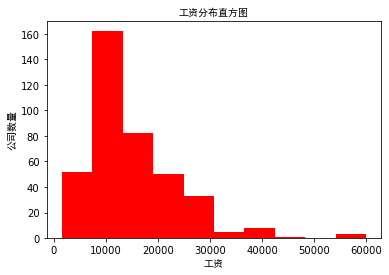

In [3]:
# 从表中可以看出，薪水一列是采用“最低-最高”的区间的方式进行表示的，这里我们将其转换成平均值，这里我们将工资中的‘k’、‘K’换成数字，便于计算。
min_ = data['salary'].str.split('-').str[0].str.rstrip('k').str.rstrip('K').astype('float64')*1000
max_ = data['salary'].str.split('-').str[1].str.rstrip('k').str.rstrip('K').astype('float64')*1000
salary = (min_ + max_) * 0.5
plt.hist(salary,10,facecolor = 'r')
plt.xlabel('工资',fontproperties = 'SimHei')
plt.ylabel('公司数量',fontproperties = 'SimHei')
plt.title('工资分布直方图',fontproperties = 'SimHei')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

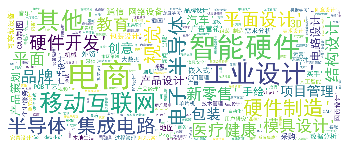

In [4]:
tags = data['tags']
text = []
for tag in tags:
    words = str(tag).split(sep='|')
    text.extend(words)
# string = str(text).replace('Python','').replace('数据挖掘','').replace('大数据','')
string = str(text)
font = r'C:\Windows\Fonts\SimHei.TTF'
wc = wordcloud.WordCloud(font_path=font, 
               background_color='white',
               width=1000,
               height=400,
               )
wc.generate(string)
wc.to_file('gongyi.png') #保存图片
# plt.figure(figsize=(1000,400))
plt.imshow(wc)  #用plt显示图片
plt.axis('off') #不显示坐标轴
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

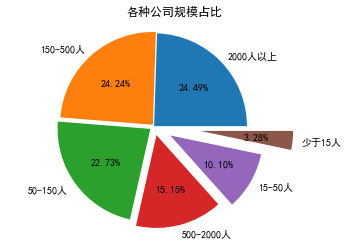

In [5]:
_ = data['company_scale'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.2,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司规模占比')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

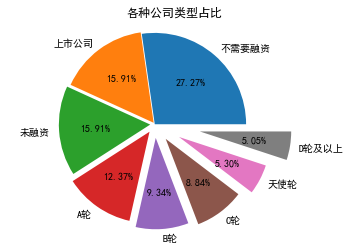

In [6]:
_ = data['company_type'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.15,0.2,0.3,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('各种公司类型占比')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

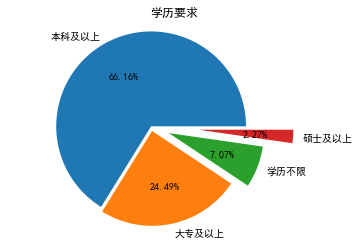

In [7]:
_ = data['education'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.05,0.2,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('学历要求')
plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

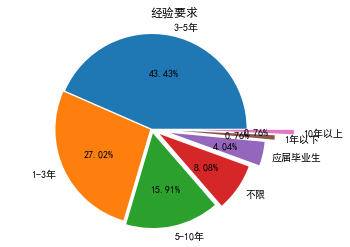

In [10]:
_ = data['work_experience'].value_counts()
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.pie(_, labels = list(_.index), explode = [0,0.02,0.05,0.1,0.2,0.3,0.5], autopct = '%1.2f%%',startangle = 0)
plt.title('经验要求')
plt.axis('equal')
plt.show()

In [9]:
data['city'].value_counts()

深圳      107
北京       84
广州       63
上海       38
杭州       37
成都       14
佛山        7
东莞        6
武汉        4
珠海        3
厦门        3
合肥        3
重庆        2
济南        2
南京        2
郑州        2
太原        1
天津        1
沈阳        1
惠州        1
西安        1
南宁        1
福州        1
无锡        1
乌鲁木齐      1
韶关        1
宁波        1
肇庆        1
青岛        1
三亚        1
苏州        1
德州        1
南昌        1
南通        1
中山        1
Name: city, dtype: int64